In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #data visualization like creating plots
import seaborn as sns #Statistical data visualization library

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Jessy/Laptop Prices Analysis/amazon_laptop_prices.csv') # import csv file
df.head(5) # show the first 5 rows

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"


In [3]:
df.shape # number of rows and columns

(4446, 14)

In [4]:
df.describe() # some calculations like max, min, count, etc

,rating
count,2174.000000
mean,4.086891
std,1.165337
min,1.000000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


In [5]:
df.info() # determine the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [6]:
df.isnull().sum() # display the sum of the missing values

brand                      0
model                   1164
screen_size               29
color                    579
harddisk                 576
cpu                      100
ram                       61
OS                        26
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed               2926
rating                  2272
price                      5
dtype: int64

In [7]:
################### DATA CLEANING ########################
# For this cleaning process, I will demostrate:
#
# 1. Convert brand rows to lower case from "DELL" & "Dell" to "dell"
# 2. Convert prices to numeric value from "$589.99" to just "589.99"
# 3. Convert screen_size rows from "14 inches" to just "14"
# 4. Convert RAM rows from "8 GB" to just "8"
#

In [8]:
# 1 Convert brand rows to lower case

df.brand.unique() #Lets see what names we have under the "brand" column

array(['ROKC', 'HP', 'MSI', 'Apple', 'Acer', 'ASUS', 'acer', 'Gateway',
       'Lenovo', 'DELL', 'Dell', 'LG', 'Microsoft', 'SAMSUNG',
       'Carlisle FoodService Products', 'Gigabyte', 'Razer', 'Asus',
       'LENOVO', 'Panasonic', 'Toughbook', 'Corsair', 'Alienware', 'AWOW',
       'Quality Refurbished Computers', 'dell', 'IVIEW', 'hp', 'XPG',
       'Computer Upgrade King', 'CTL', 'Best Notebooks', 'LPT',
       'Goldengulf', 'lenovo', 'ONN', 'Latitude', 'VAIO', 'Luqeeg',
       'MICROTELLA', 'Elo', 'SHOXLAB', 'GizPro', 'MAINGEAR', 'Tocosy',
       'asus', 'XAMMUE', 'JTD', 'Mytrix', 'TOPOSH'], dtype=object)

In [9]:
df.brand = df.brand.str.lower() # convert all rows to lower case
df.brand = df.brand.str.strip() # remove trailing white spaces, if any

brand = df.brand.unique() # ASUS, Asus became asus.  same as lenovo, and dell
brand.sort()
brand

array(['acer', 'alienware', 'apple', 'asus', 'awow', 'best notebooks',
       'carlisle foodservice products', 'computer upgrade king',
       'corsair', 'ctl', 'dell', 'elo', 'gateway', 'gigabyte', 'gizpro',
       'goldengulf', 'hp', 'iview', 'jtd', 'latitude', 'lenovo', 'lg',
       'lpt', 'luqeeg', 'maingear', 'microsoft', 'microtella', 'msi',
       'mytrix', 'onn', 'panasonic', 'quality refurbished computers',
       'razer', 'rokc', 'samsung', 'shoxlab', 'tocosy', 'toposh',
       'toughbook', 'vaio', 'xammue', 'xpg'], dtype=object)

In [10]:
df.brand.value_counts() # lets check the count of each brand

dell                             1730
hp                                810
rokc                              637
msi                               473
lenovo                            318
asus                              163
acer                              119
lg                                 39
apple                              29
samsung                            23
microsoft                          15
alienware                          14
panasonic                          12
gigabyte                           11
toughbook                          11
razer                               6
luqeeg                              3
latitude                            3
shoxlab                             2
ctl                                 2
computer upgrade king               2
iview                               2
quality refurbished computers       2
gateway                             2
xpg                                 1
mytrix                              1
jtd         

In [11]:
#2 Convert prices to numeric value

print(df.price)
print('Number of null values are: ', df.price.isnull().sum())

0         $589.99 
1         $999.99 
2       $1,599.00 
3         $689.99 
4       $1,144.48 
           ...    
4441    $1,699.00 
4442      $589.99 
4443      $591.99 
4444    $1,771.99 
4445      $938.99 
Name: price, Length: 4446, dtype: object
Number of null values are:  5


In [12]:
df.price.value_counts()

$389.99       315
$589.99       310
$999.99       252
$1,599.00     210
$1,699.00     204
             ... 
$2,629.98       1
$1,659.67       1
$245.01         1
$2,951.99       1
$938.99         1
Name: price, Length: 1858, dtype: int64

In [13]:
df.price = df.price.str.replace('$', '', regex=True)
df.price = df.price.str.replace(',', '', regex=True)
df.price.value_counts()

389.99      315
589.99      310
999.99      252
1599.00     210
1699.00     204
           ... 
2629.98       1
1659.67       1
245.01        1
2951.99       1
938.99        1
Name: price, Length: 1858, dtype: int64

In [14]:
df.price = pd.to_numeric(df.price)
df.price

0        589.99
1        999.99
2       1599.00
3        689.99
4       1144.48
         ...   
4441    1699.00
4442     589.99
4443     591.99
4444    1771.99
4445     938.99
Name: price, Length: 4446, dtype: float64

In [15]:
# 3. Convert screen_size rows

df.screen_size

0          14 Inches
1        15.6 Inches
2       15.66 Inches
3        13.3 Inches
4        15.3 Inches
            ...     
4441     15.6 Inches
4442       14 Inches
4443     15.6 Inches
4444       14 Inches
4445       14 Inches
Name: screen_size, Length: 4446, dtype: object

In [16]:
df.screen_size.isnull().sum()

29

In [17]:
df.screen_size.value_counts()

15.6 Inches     1995
14 Inches       1113
16 Inches        362
15.66 Inches     196
13.3 Inches      194
17.3 Inches      150
17 Inches         89
11.6 Inches       84
13.4 Inches       43
18 Inches         41
13 Inches         36
15 Inches         25
13.5 Inches       11
12.5 Inches       10
14.1 Inches        9
12 Inches          7
10.1 Inches        7
13.1 Inches        6
16.1 Inches        5
14.5 Inches        4
16.2 Inches        4
13.6 Inches        4
15.4 Inches        3
12.3 Inches        3
13.9 Inches        3
11 Inches          2
12.4 Inches        2
12.45 Inches       2
10.5 Inches        1
12.2 Inches        1
14.4 Inches        1
15.3 Inches        1
22 Inches          1
27 Inches          1
10 Inches          1
Name: screen_size, dtype: int64

In [18]:
df.screen_size.replace(" Inches","", inplace=True, regex=True)
df.screen_size

0          14
1        15.6
2       15.66
3        13.3
4        15.3
        ...  
4441     15.6
4442       14
4443     15.6
4444       14
4445       14
Name: screen_size, Length: 4446, dtype: object

In [19]:
df.screen_size = pd.to_numeric(df.screen_size)
df.screen_size

0       14.00
1       15.60
2       15.66
3       13.30
4       15.30
        ...  
4441    15.60
4442    14.00
4443    15.60
4444    14.00
4445    14.00
Name: screen_size, Length: 4446, dtype: float64

In [20]:
# 4. Convert RAM rows

df.ram

0        8 GB
1       64 GB
2       32 GB
3        8 GB
4        8 GB
        ...  
4441    32 GB
4442     8 GB
4443     8 GB
4444     8 GB
4445      NaN
Name: ram, Length: 4446, dtype: object

In [21]:
df.ram.value_counts()

16 GB       1344
32 GB       1092
8 GB         791
64 GB        502
20 GB        331
4 GB         216
12 GB         40
24 GB         21
40 GB         13
48 GB         12
2 GB           9
1 GB           4
128 GB         3
6 GB           3
64 MB          1
5 GB           1
96 GB          1
31.99 GB       1
Name: ram, dtype: int64

In [22]:
df.ram.replace(" GB","", inplace=True, regex=True)
df.ram.replace(" MB","", inplace=True, regex=True) 
df.ram.value_counts()

16       1344
32       1092
8         791
64        503
20        331
4         216
12         40
24         21
40         13
48         12
2           9
1           4
128         3
6           3
96          1
5           1
31.99       1
Name: ram, dtype: int64

In [23]:
df.ram = pd.to_numeric(df.ram)
df.ram

0        8.0
1       64.0
2       32.0
3        8.0
4        8.0
        ... 
4441    32.0
4442     8.0
4443     8.0
4444     8.0
4445     NaN
Name: ram, Length: 4446, dtype: float64

In [24]:

################################################# DATA ANALYSIS ################################################################


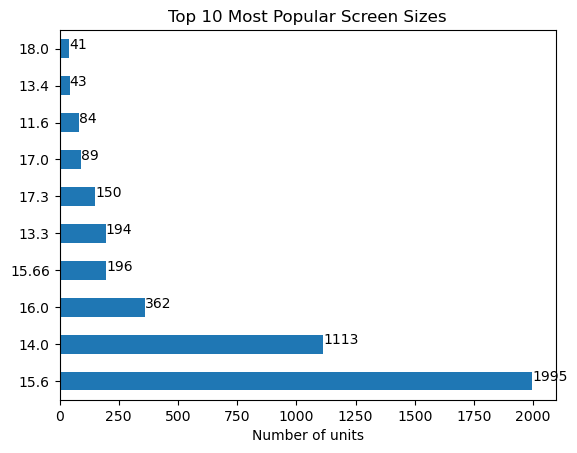

In [36]:
# Top 10 most popular screen sizes

size_counts = df['screen_size'].value_counts().head(10)
size_counts.plot(kind='barh')
plt.title('Top 10 Most Popular Screen Sizes')
plt.xlabel('Number of units')
for index, value in enumerate(size_counts):
    plt.text(value, index, str(value))
plt.show()

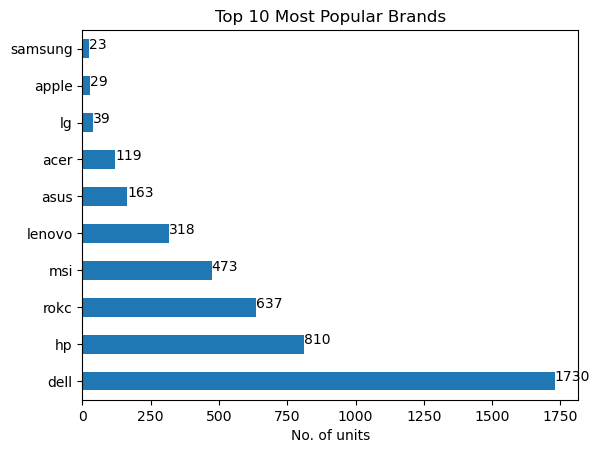

In [25]:
# Top 10 most popular brands

brand_counts = df['brand'].value_counts().head(10)
brand_counts.plot(kind='barh')
plt.title('Top 10 Most Popular Brands')
plt.xlabel('Number of units')
for index, value in enumerate(brand_counts):
    plt.text(value, index, str(value))
plt.show()

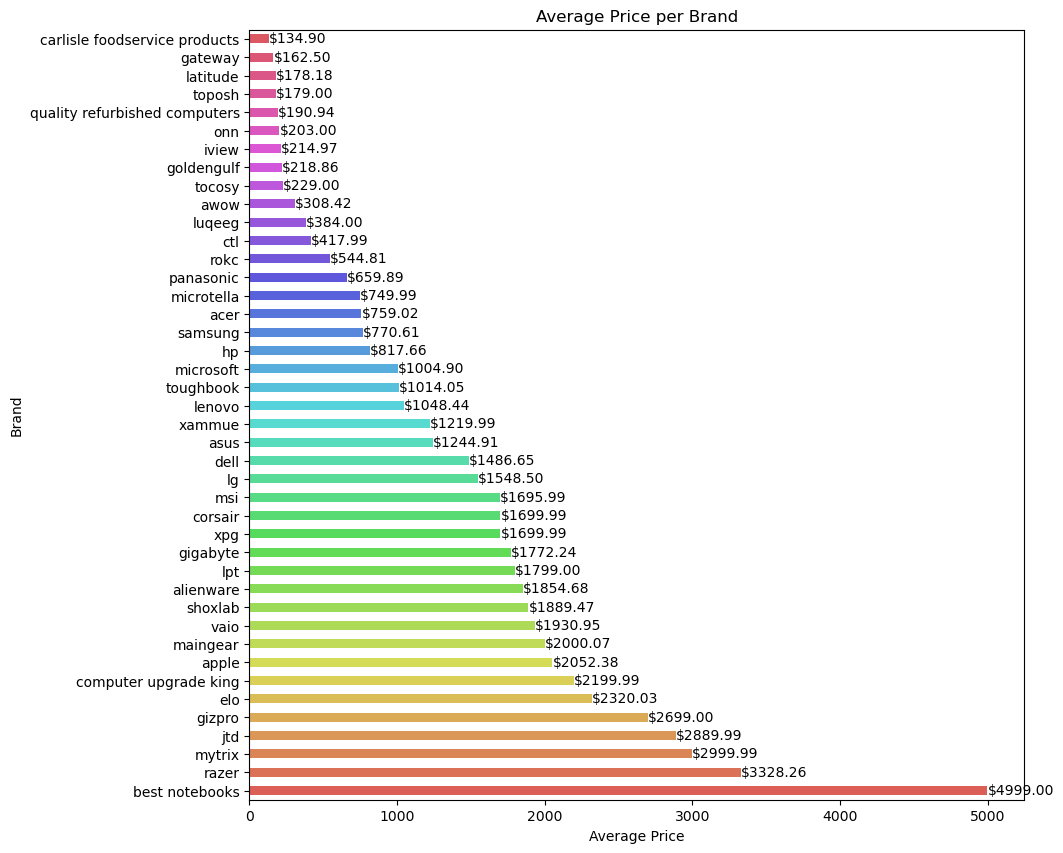

In [26]:
# Average price per brand

average_prices = df.groupby('brand')['price'].mean() # Calculate average prices

num_colors = len(average_prices) # Create a color palette
color_palette = sns.color_palette('hls', num_colors)

plt.figure(figsize=(10, 10)) # plot the bar chart
average_prices.sort_values(ascending=False).plot(kind='barh', color=color_palette)
plt.title('Average Price per Brand')
plt.xlabel('Average Price')
plt.ylabel('Brand')

for index, value in enumerate(average_prices.sort_values(ascending=False)): # Display values on the plot
    plt.text(value, index, f"${value:.2f}", va='center')
plt.show()

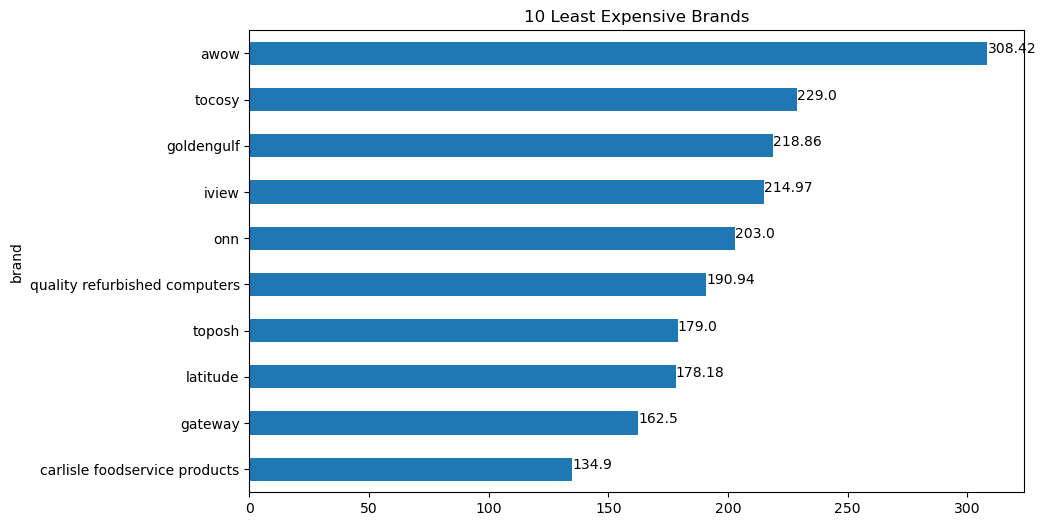

In [27]:
# Top 10 least expensive brands

least_prices = df.groupby('brand').price.mean().nsmallest(10)
sx = least_prices.plot(kind='barh', title='10 Least Expensive Brands', figsize=(10,6))
for index, value in enumerate(least_prices):
    plt.text(value, index, str(round(value, 2)))
plt.show()

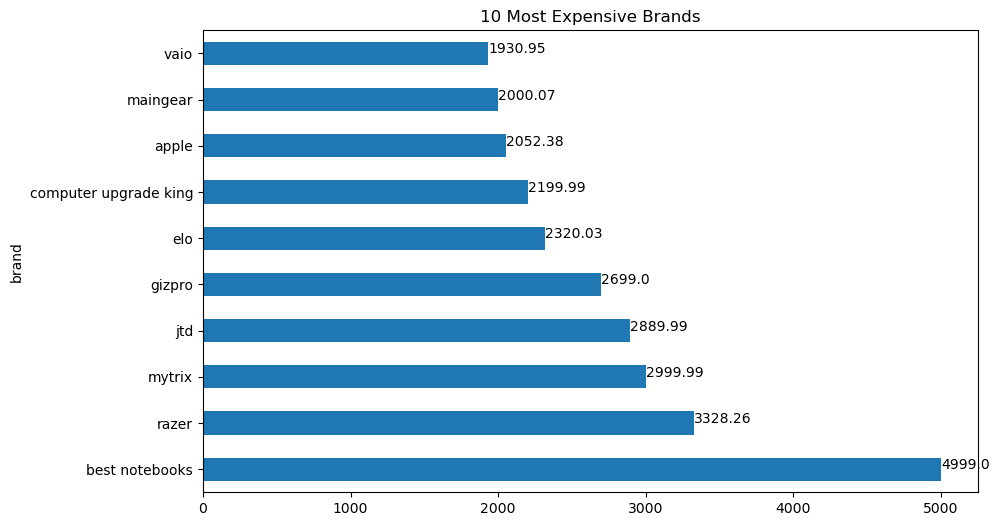

In [28]:
# Top 10 most expensive brands

top_prices = df.groupby('brand').price.mean().nlargest(10)
ax = top_prices.plot(kind='barh', title='10 Most Expensive Brands', figsize=(10,6))
for index, value in enumerate(top_prices):
    plt.text(value, index, str(round(value, 2)))
plt.show()

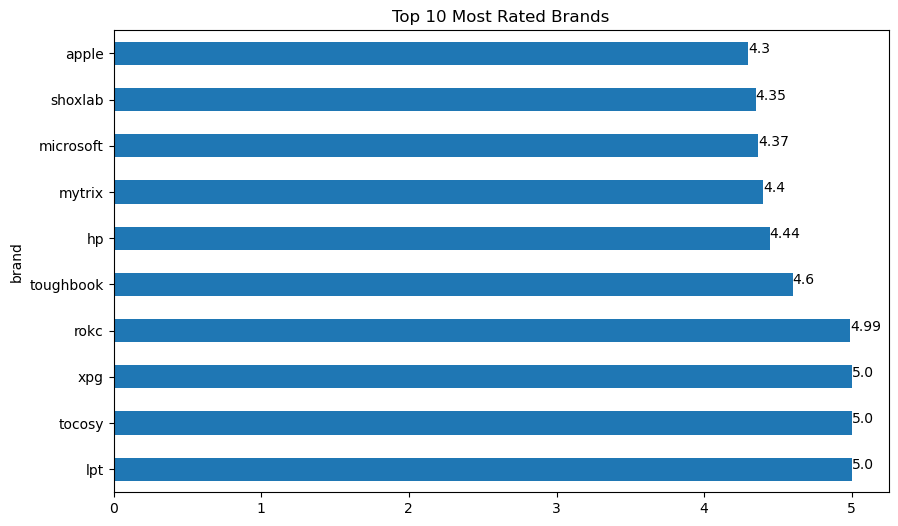

In [29]:
# Top 10 most rated brands

top_ratings = df.groupby('brand').rating.mean().nlargest(10)
ax = top_ratings.plot(kind='barh', title='Top 10 Most Rated Brands', figsize=(10,6))
for index, value in enumerate(top_ratings):
    plt.text(value, index, str(round(value, 2)))
plt.show()

In [30]:
# products with at least 20 inch screen size 

products_with_at_least_20_inches = df[df['screen_size'] >= 20][['brand', 'model', 'screen_size', 'price']]
print(products_with_at_least_20_inches)

     brand     model  screen_size    price
2291   elo    EloPOS         22.0  2320.03
3165    hp  Pavilion         27.0  1999.99


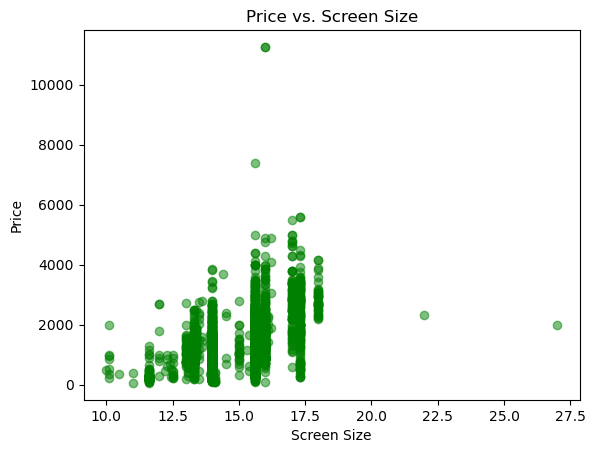

In [37]:
# Price vs Screen Size

plt.scatter(df['screen_size'], df['price'], alpha=0.5, color='green')
plt.title('Price vs. Screen Size')
plt.xlabel('Screen Size')
plt.ylabel('Price')
plt.show()